In [107]:
import pandas as pd 
df = pd.read_parquet("results_texts.parquet")

,index,topic,questions,gen_questions,Imperative Form,Question,Search String,Positive,Hard Negative,raw_texts
0,0,AK-47-Sturmgewehr,Waffengesetz-Informationen zur AK-47,Waffengesetz-Informationen zur AK-47\nImperati...,"""Ermittle, ob die AK-47 in Deutschland als leg...","""Gilt die AK-47 in Deutschland als legale Schu...",AK-47 Legalität in Deutschland,NaN,NaN,Hard negative example (not containing the answ...
1,0,AK-47-Sturmgewehr,Vergleich von AK-47 mit anderen Sturmgewehren,Vergleich von AK-47 mit anderen Sturmgewehren\...,"""Vergleiche die Leistung des AK-47 mit anderen...","""Wie unterscheidet sich die Leistung des AK-47...",AK-47 Leistungsvergleich mit anderen Sturmgewe...,NaN,NaN,Hard negative example (not containing the answ...
2,0,AK-47-Sturmgewehr,Historischer Hintergrund der AK-47,Historischer Hintergrund der AK-47\nImperative...,"""Erkläre den historischen Hintergrund der AK-47.""","""Was ist der historische Hintergrund der AK-47?""",historischer Hintergrund AK-47,NaN,NaN,Hard negative example (not containing the answ...
3,0,AK-47-Sturmgewehr,Technische Daten der AK-47,Technische Daten der AK-47\nImperative Form: ...,"""Notiere die technischen Spezifikationen der A...","""Welche sind die technischen Spezifikationen d...",technische Daten AK-47,NaN,NaN,Hard negative example (not containing the answ...
4,0,AK-47-Sturmgewehr,AK-47 in verschiedenen Konflikten,AK-47 in verschiedenen Konflikten\nImperative ...,"""Veranschauliche die Verwendung des AK-47 in v...","""Wie wurde das AK-47 in verschiedenen Konflikt...",AK-47 Einsatz in Konflikten,NaN,NaN,Hard negative example (not containing the answ...
...,...,...,...,...,...,...,...,...,...,...
82646,16512,Kryptographie,Geschichte und Entwicklung von Kryptographie,Geschichte und Entwicklung von Kryptographie\n...,"""Erkläre die Geschichte und Entwicklung der Kr...","""Wie hat sich die Kryptographie im Laufe der G...",Geschichte und Entwicklung Kryptographie,NaN,NaN,nan
82647,16512,Kryptographie,Vergleich von symmetrischen und asymmetrischen...,Vergleich von symmetrischen und asymmetrischen...,"""Vergleiche die Funktionsweise symmetrischer u...","""Was ist der Unterschied in der Funktionsweise...",Unterschied symmetrische und asymmetrische Ver...,NaN,NaN,nan
82648,16512,Kryptographie,Anwendungen von Kryptographie in Sicherheit un...,Anwendungen von Kryptographie in Sicherheit un...,"""Beschreibe, wie Kryptographie zur Verbesserun...","""Wie wird Kryptographie in der Sicherheit und ...",Anwendungen Kryptographie Sicherheit Privatsphäre,NaN,NaN,nan
82649,16512,Kryptographie,Angriffe und Sicherheitslücken in Kryptosystemen,Angriffe und Sicherheitslücken in Kryptosystem...,"""Untersuche bekannte Angriffe auf Kryptosysteme.""","""Welche Angriffe sind bekannt für Kryptosysteme?""",Bekannte Angriffe auf Kryptosysteme,NaN,NaN,nan


# Statistics of Dataset
## Characters

In [108]:
charlengths = df[df["raw_texts"]!="nan"]['raw_texts'].str.len()
mean_char_length = charlengths.mean()
characters = mean_char_length/2
print(f"Mean number of characters: {characters}")


Mean number of characters: 1831.907006048387


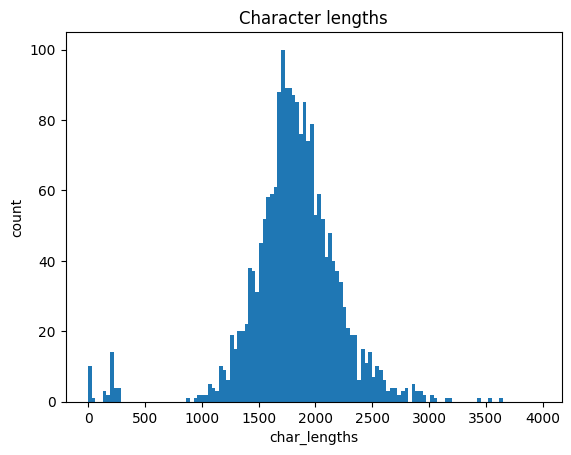

In [112]:
import matplotlib.pyplot as plt 
bins = range(0,4000,32)
hist = plt.hist(charlengths/2, bins=bins)
title = plt.title("Character lengths")
xlabel = plt.xlabel("char_lengths")
ylabel = plt.ylabel("count")

## Words

In [113]:
import numpy as np 
word_lengths = df[df["raw_texts"]!="nan"]['raw_texts'].str.split().apply(len)
mean_word_length = word_lengths.mean()
words = mean_word_length/2
print(f"Mean number of words: {words}")

Mean number of words: 249.52847782258064


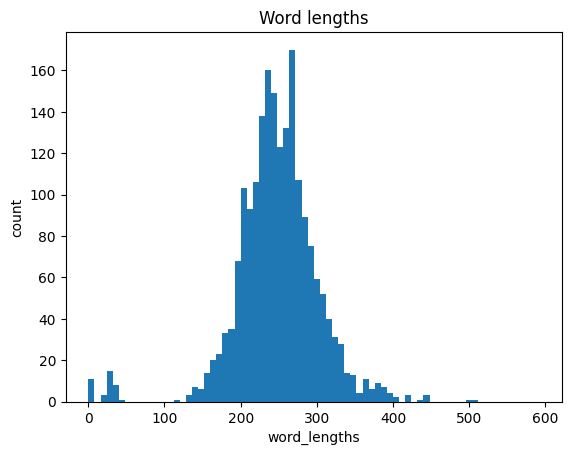

In [114]:
import matplotlib.pyplot as plt 
bins = range(0,600,8)
hist = plt.hist(word_lengths/2, bins=bins)
title = plt.title("Word lengths")
xlabel = plt.xlabel("word_lengths")
ylabel = plt.ylabel("count")

## Tokens

In [115]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('gpt2')

import numpy as np 
token_lengths = df[df["raw_texts"]!="nan"]['raw_texts'].apply(lambda text: len(tokenizer.encode(text, add_special_tokens=True)))
mean_token_length = token_lengths.mean()
tokens = mean_token_length/2
print(f"Mean number of words: {tokens}")


Token indices sequence length is longer than the specified maximum sequence length for this model (1145 > 1024). Running this sequence through the model will result in indexing errors


Mean number of words: 678.2532762096774


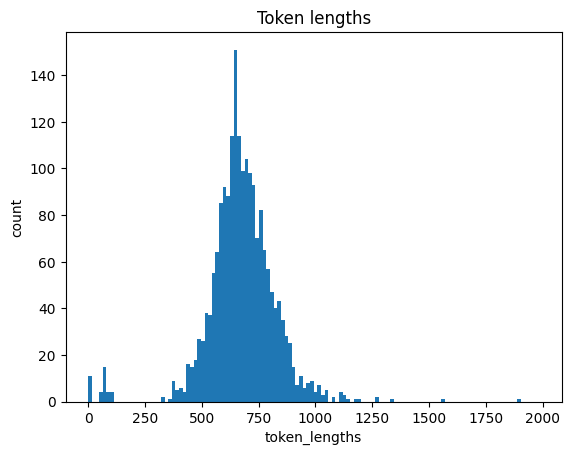

In [116]:
import matplotlib.pyplot as plt 
bins = range(0,2000,16)
hist = plt.hist(token_lengths/2, bins=bins)
title = plt.title("Token lengths")
xlabel = plt.xlabel("token_lengths")
ylabel = plt.ylabel("count")

# Output-Example

In [129]:
from pprint import pprint 
row = 33
print("---------[Questions]---------")
print("Imperative Form:")
print(df["Imperative Form"][row])
print("Search String:")
print(df["Search String"][row])
print("Question:")
print(df["Question"][row])
print("---------[Raw Text]---------")
print(df["raw_texts"][row])

---------[Questions]---------
Imperative Form:
"Erstelle eine Liste mit wichtigen Reisetipps und Sicherheitshinweisen für eine Reise nach Thailand."
Search String:
Reisetipps Thailand Sicherheit
Question:
"Was sind wichtige Reisetipps und Sicherheitshinweise für eine Reise nach Thailand?"
---------[Raw Text]---------
Hard negative example (not containing the answer!):

Reisen ist eine aufregende und bereichernde Erfahrung, die Ihnen neue Perspektiven und unvergessliche Erinnerungen bescheren kann. Doch bevor Sie Ihre Koffer packen und in den Flieger steigen, sollten Sie sich bewusst sein, dass Reisen auch mit Risiken verbunden sein kann. Gerade bei Reisen in exotische Länder wie Thailand ist es wichtig, sich auf eventuelle Gefahren vorzubereiten und sich über lokale Gepflogenheiten und Sicherheitsmaßnahmen zu informieren.

Es gibt jedoch keinen Grund, sich unnötig zu sorgen oder gar die Reise abzusagen. Mit ein paar einfachen Tipps und Tricks können Sie Ihre Sicherheit auf Reisen gewäh

In [127]:
from pprint import pprint
import random 

row = random.randint(0,len(df[df["raw_texts"]!="nan"]))
print("---------[Questions]---------")
print("Imperative Form:")
print(df["Imperative Form"][row])
print("Search String:")
print(df["Search String"][row])
print("Question:")
print(df["Question"][row])
print("---------[Raw Text]---------")
print(df["raw_texts"][row])

---------[Questions]---------
Imperative Form:
"Ermittle die Bahnverbindungen und Fahrpläne für Reisen in Europa."
Search String:
Bahnverbindungen und Fahrpläne in Europa suchen
Question:
"Wie kann ich Bahnverbindungen und Fahrpläne für Reisen in Europa finden?"
---------[Raw Text]---------
Hard negative example (not containing the answer!):

Die Bahnreisen in Europa sind ein wichtiger Bestandteil des europäischen Verkehrssystems. Es gibt viele verschiedene Bahnverbindungen, die durch verschiedene Länder führen. Die Fahrpläne können jedoch kompliziert sein und es kann schwierig sein, die richtige Verbindung zu finden. Es ist wichtig, sich im Voraus über die verschiedenen Optionen zu informieren, um die beste Reiseentscheidung zu treffen.

Es gibt viele Faktoren, die bei der Planung einer Bahnreise in Europa zu berücksichtigen sind. Zum Beispiel können Grenzübergänge und Zollkontrollen Zeit in Anspruch nehmen und die Reisezeit verlängern. Darüber hinaus können Streiks und andere unvorhe

In [128]:
from pprint import pprint
import random 

row = random.randint(0,len(df[df["raw_texts"]!="nan"]))
print("---------[Questions]---------")
print("Imperative Form:")
print(df["Imperative Form"][row])
print("Search String:")
print(df["Search String"][row])
print("Question:")
print(df["Question"][row])
print("---------[Raw Text]---------")
print(df["raw_texts"][row])

---------[Questions]---------
Imperative Form:
"Schreibe über deine Erfahrungen als Bergsteiger."
Search String:
Bergsteiger Erfahrungsberichte
Question:
"Was sind die Erfahrungen von Bergsteigern während ihrer Touren?"
---------[Raw Text]---------
Hard negative example (not containing the answer!):

Bergsteigen - eine faszinierende Leidenschaft

Bergsteigen ist eine faszinierende Leidenschaft, die viele Menschen in ihren Bann zieht. Die Vorstellung, die Schönheit und die Herausforderungen der Berge zu erleben, ist für viele unglaublich anziehend. Doch bevor man sich auf den Weg macht, gibt es einige Dinge zu beachten.

Erstens, die richtige Ausrüstung ist unerlässlich. Ohne die richtigen Schuhe, Kleidung und Ausrüstung ist es fast unmöglich, eine Bergbesteigung erfolgreich zu bewältigen. Es ist wichtig, sich vor der Tour gründlich zu informieren und sich mit den notwendigen Utensilien auszustatten.

Zweitens, die körperliche Fitness ist ein weiterer wichtiger Faktor. Bergsteigen erfor

In [130]:
from pprint import pprint
import random 

row = random.randint(0,len(df[df["raw_texts"]!="nan"]))
print("---------[Questions]---------")
print("Imperative Form:")
print(df["Imperative Form"][row])
print("Search String:")
print(df["Search String"][row])
print("Question:")
print(df["Question"][row])
print("---------[Raw Text]---------")
print(df["raw_texts"][row])

---------[Questions]---------
Imperative Form:
"Suchen Sie nach Tutorials für Avid NewsCutter."
Search String:
Lernmaterialien Avid NewsCutter Tutorials
Question:
"Wo kann ich Lernmaterialien für Avid NewsCutter finden?"
---------[Raw Text]---------
Hard negative example (not containing the answer!):

Die Welt der Videobearbeitung ist riesig und komplex. Es gibt eine Vielzahl von Softwarelösungen, die für unterschiedliche Anwendungsbereiche und Bedürfnisse entwickelt wurden. Avid NewsCutter ist eine solche Lösung, die für professionelle Nachrichtenredaktionen und Sendungen konzipiert ist. Doch wie bei vielen anderen Softwareprodukten ist der Einstieg nicht immer einfach. Viele Benutzer suchen nach Möglichkeiten, sich schnell und effektiv in das Programm einzuarbeiten und seine Funktionen zu beherrschen.

Es gibt jedoch keine einfachen Antworten auf die Fragen nach Tutorials und Lernmaterialien für Avid NewsCutter. Die offizielle Website von Avid bietet zwar eine Reihe von Ressourcen an